In [49]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import xlrd
import gc
import numpy as np
gc.collect()

0

In [36]:
# rain in 2017 2018 in t
year_list=["2017","2018"]
data=[]
for year in year_list:
    url="https://www.cwb.gov.tw/V7/climate/dailyPrecipitation/Data/466920_"+year+".htm"
    res=requests.get(url)
    soup=BeautifulSoup(res.text, "html5lib")
    day=31
    for i in range(1,day+1):
        temp=soup.select("table")[1].select("tr")[i].text.replace(" ","").split("\n")
        temp=temp[1:-1]
        for j in range(1,13):
            data_dic={}
            if temp[j]=="":
                continue
            elif temp[j]=="-":
                data_dic["rain"]="0"
            elif temp[j]=="T":
                 data_dic["rain"]="0.1"
            elif temp[j]=="X":
                 data_dic["rain"]="nan"
            else:
                data_dic["rain"]=temp[j]

            if  (j<10):    
                if (i<10):
                    data_dic["date"]=year+ "0"+ str(j)+"0"+temp[0]
                else:
                    data_dic["date"]=year+ "0"+ str(j)+""+temp[0]
            else:
                if (i<10):
                    data_dic["date"]=year+ ""+ str(j)+"0"+temp[0]
                else:
                    data_dic["date"]=year+ ""+ str(j)+""+temp[0]

            data.append(data_dic)

In [37]:
rain_data = pd.DataFrame(data)
rain_data.head()

,date,rain
0,20170101,0
1,20170201,0
2,20170301,2.3
3,20170401,11.9
4,20170501,0


In [44]:
rain_data["New_datetime"]=pd.to_datetime(rain_data["date"],format='%Y%m%d', errors='ignore')
rain_data=rain_data.sort_values("New_datetime")
del rain_data["date"]
rain_data=rain_data.set_index("New_datetime")
rain_data.head()

,rain
New_datetime,
2017-01-01,0
2017-01-02,0
2017-01-03,0.6
2017-01-04,0
2017-01-05,0


In [6]:
data_91app=pd.read_csv("Ntu_Orders.csv")
data_91app["New_datetime"]=pd.to_datetime(data_91app["DateId"],format='%Y%m%d', errors='ignore')

In [23]:
data_91app_datetimeQuantity=data_91app.groupby(by="New_datetime")["Quantity"].sum()
type(data_91app_datetimeQuantity)
df=data_91app_datetimeQuantity.to_frame()

In [34]:
df.head()

,Quantity
New_datetime,
2017-01-01,3823
2017-01-02,5105
2017-01-03,3623
2017-01-04,2889
2017-01-05,2843


In [54]:
data_conbime=pd.concat([df, rain_data], axis=1)
data_conbime = data_conbime[np.isfinite(data_conbime["Quantity"])]
data_conbime.head()

,Quantity,rain
New_datetime,,
2017-01-01,3823.0,0
2017-01-02,5105.0,0
2017-01-03,3623.0,0.6
2017-01-04,2889.0,0
2017-01-05,2843.0,0


TypeError: Empty 'DataFrame': no numeric data to plot

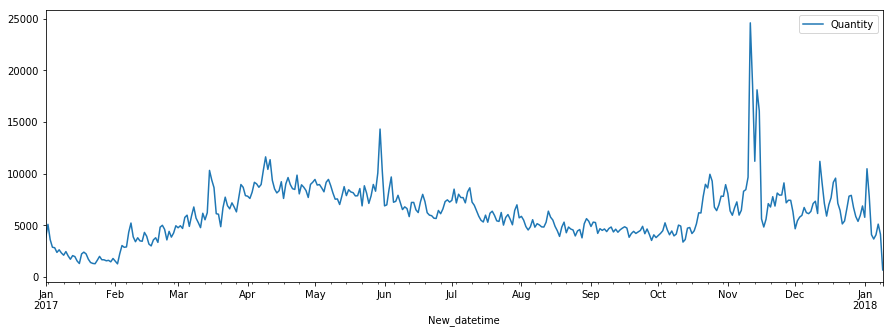

In [59]:
df.plot(figsize=(15,5))
rain_data.unstack().plot(figsize=(15,5))